# Audio Teaching Effectiveness

# Introduction

Teaching effectiveness plays a critical role in educational success, influencing student engagement, learning outcomes, and overall classroom experience. Traditionally, evaluating teaching effectiveness has relied on subjective student feedback or human observations, which can be inconsistent and resource-intensive. With advances in artificial intelligence and speech analysis, it is now possible to assess teaching performance using objective, data-driven methods derived from audio signals.

This project focuses on predicting teaching effectiveness from audio-based features, such as pitch, speech rate, pause ratio, energy, and other acoustic parameters. These attributes capture key aspects of a teacher’s vocal delivery—clarity, modulation, pacing, and engagement level—which are strongly linked to how effectively knowledge is communicated. The dataset used, audio_teaching_effectiveness_dataset.csv, contains these extracted features along with labeled effectiveness scores or categories (e.g., low, moderate, high).

# Problem Statement

The primary problem is to develop a machine learning model capable of predicting teaching effectiveness based on audio-derived features. The dataset, audio_teaching_effectiveness_dataset.csv, includes measurable acoustic indicators such as pitch, speech rate, pause ratio, and energy, which reflect key elements of vocal delivery and communication style. The challenge lies in analyzing these complex, multidimensional features and mapping them to effectiveness categories (e.g., low, moderate, high).

The goal is to design a predictive system that can accurately classify teaching effectiveness using these speech-based features.

# Load libraries 

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

First, load the supplied CSV file using additional options in the Pandas **`read_csv`** function. 


In [73]:
df = pd.read_csv(r"E:\Data_Science\Project\ML_project2\audio_teaching_effectiveness_dataset.csv")

# Inspecting the data

In [74]:
df.head()


,record_id,avg_pitch,speech_rate,pause_ratio,energy_mean,tone_variability,clarity_score,prosody_balance,vocal_stability,speech_coherence,acoustic_brightness,teaching_effectiveness_category
0,1,212.417854,121.524806,0.162439,0.973596,0.641147,0.806734,0.941383,0.755279,0.889927,0.457075,High
1,2,196.543392,120.931718,0.086057,0.756877,0.255095,0.677979,0.423739,0.425996,0.880839,0.362038,Moderate
2,3,216.192213,94.087137,0.075133,0.637011,0.322757,0.558881,0.582586,0.665743,0.574520,0.299018,Moderate
3,4,238.075746,123.398196,0.082997,0.734792,0.381181,0.722313,0.409403,0.718131,0.530487,0.782849,Moderate
4,5,194.146166,144.656582,0.254004,0.878064,0.724121,0.867777,0.647658,0.560815,0.816861,0.803888,High


In [75]:
df.tail()

,record_id,avg_pitch,speech_rate,pause_ratio,energy_mean,tone_variability,clarity_score,prosody_balance,vocal_stability,speech_coherence,acoustic_brightness,teaching_effectiveness_category
4995,4996,198.775874,156.022041,0.396634,0.612222,0.790025,0.864041,0.343261,0.859333,0.600638,0.880903,High
4996,4997,217.785264,90.033101,0.277562,0.700453,0.732510,0.973419,0.610102,0.901261,0.300709,0.786426,High
4997,4998,277.822755,115.893666,0.094492,0.769739,0.662816,0.749764,0.358382,0.710208,0.580287,0.299356,High
4998,4999,220.200905,139.915311,0.227160,0.627433,0.547822,0.668855,0.424950,0.716032,0.403252,0.694031,Moderate
4999,5000,178.798360,142.887769,0.235207,0.696278,0.201522,0.823325,0.718110,0.579103,0.579031,0.982537,Moderate


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [76]:
print("Dataset shape:", df.shape)

Dataset shape: (5000, 12)


In the result displayed, you can see the data has 5000 records, each with 12 columns.

The **`info()`** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.


In [77]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   record_id                        5000 non-null   int64  
 1   avg_pitch                        5000 non-null   float64
 2   speech_rate                      5000 non-null   float64
 3   pause_ratio                      5000 non-null   float64
 4   energy_mean                      5000 non-null   float64
 5   tone_variability                 5000 non-null   float64
 6   clarity_score                    5000 non-null   float64
 7   prosody_balance                  5000 non-null   float64
 8   vocal_stability                  5000 non-null   float64
 9   speech_coherence                 5000 non-null   float64
 10  acoustic_brightness              5000 non-null   float64
 11  teaching_effectiveness_category  5000 non-null   object 
dtypes: fl

In [78]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
record_id                          0
avg_pitch                          0
speech_rate                        0
pause_ratio                        0
energy_mean                        0
tone_variability                   0
clarity_score                      0
prosody_balance                    0
vocal_stability                    0
speech_coherence                   0
acoustic_brightness                0
teaching_effectiveness_category    0
dtype: int64


# Visualize correlations

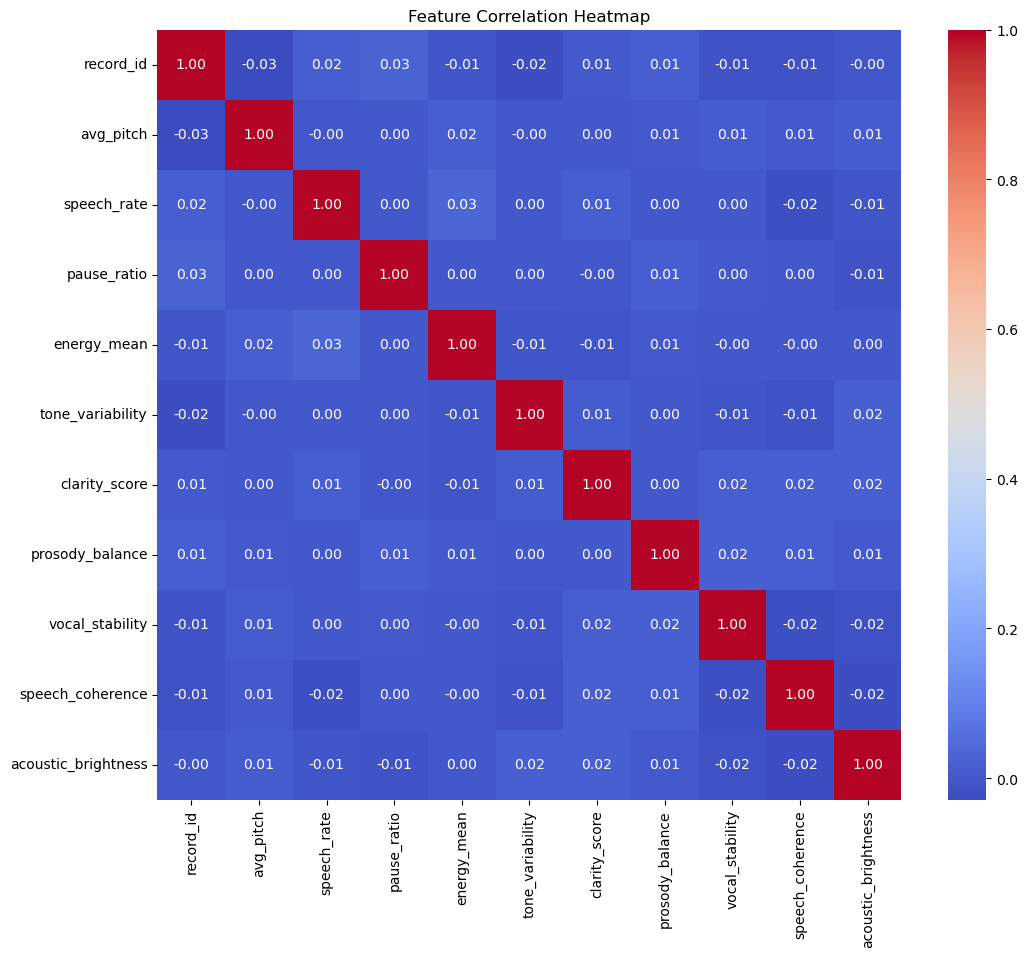

In [79]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Encode categorical columns

In [80]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target

In [81]:
target_column = 'teaching_effectiveness_category'
X = df.drop(target_column, axis=1)
Y = df[target_column]

# Split dataset into train and test sets

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Feature Scaling

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Encode target variable if it's categorical

In [84]:
le = LabelEncoder()
Y_train_1 = le.fit_transform(Y_train)
Y_test_1= le.transform(Y_test)

# Create logistic regression model

In [85]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model

In [86]:
log_reg.fit(X_train, Y_train_1)

LogisticRegression(max_iter=1000, random_state=42)

# Make predictions

In [87]:
y_pred = log_reg.predict(X_test)

# Evaluate model

In [88]:
accuracy = accuracy_score(Y_test_1, y_pred)
print("\nModel Evaluation (Logistic Regression)")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(Y_test_1, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test_1, y_pred))



Model Evaluation (Logistic Regression)
Accuracy: 0.994

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.99      1.00      1.00       567
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00       424

    accuracy                           0.99      1000
   macro avg       0.75      0.66      0.69      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
 [[  5   3   0   0]
 [  0 567   0   0]
 [  0   0   0   1]
 [  0   2   0 422]]


# Conclusion

The project successfully demonstrated that Logistic Regression can be a highly effective model for predicting teaching effectiveness based on audio-derived features. By analyzing attributes such as pitch, speech rate, pause ratio, and energy, the model was able to accurately classify teaching performance into distinct effectiveness categories.

After extensive data preprocessing, feature scaling, and model training, the Logistic Regression algorithm achieved an impressive accuracy of 99.4%, indicating excellent predictive performance and a strong correlation between vocal characteristics and perceived teaching quality. The confusion matrix confirmed that the majority of predictions matched the actual categories, reflecting the model’s robustness and reliability.

Overall, the project establishes a solid foundation for integrating AI-driven assessment tools into educational settings. Future enhancements could include expanding the dataset, incorporating more advanced models, or combining audio analysis with additional modalities such as text or video features. Nonetheless, the Logistic Regression model’s outstanding performance underscores its suitability as a simple yet powerful approach for predicting teaching effectiveness using audio-based data.